# Assignment 1, Penalized Regression:
**Author: Matthew Johnescu**

# Table of Contents:
- [Introduction](#introduction:)

# Question Reponses:

**From what perspective are you conducting the analysis? (Who are you? / Who are you working for?):**
I am a data analyst working for an e-commerce platform aiming to understand customer purchasing behavior and predict complete orders based on order confirmations.

**What is your question?:**
Can we predict whether an order will be confirmed using customer demographics, session information, and product details?

**Describe your dataset(s) including URL (if available).**
The dataset is from the Customer 360 Insights Dataset, containing information on customer demographics, transaction details, and session behavior. It is a synthetic dataset.

URL: https://www.kaggle.com/datasets/davedarshan/customer360insights/data


**What is(are) your independent variable(s) and dependent variable(s)? Include variable type (binary, categorical, numeric).**
Independent variables:
- Gender (categorical - one-hot encoded)
- Age (numeric)
- CreditScore (numeric, binned into categorical features)
- MonthlyIncome (numeric, binned into categorical features)
- Country, State, City (categorical - one-hot encoded)
- Price (numeric)
- CampaignSchema (categorical - one-hot encoded)
- Category (categorical - one-hot encoded)
Dependent variable:
- OrderConfirmation (binary, converted to integer for regression)

**How are your variables suitable for your analysis method?**
All independent variables are either numeric or have been properly processed using one-hot encoding or binning, making them suitable for linear regression. The linear regression model can effectively work with both the scaled numeric features and the one-hot encoded categorical features.


**What are your conclusions (include references to one or two CLEARLY INDICATED AND IMPORTANT graphs or tables in your output)?**



**What are your assumptions and limitations? Did you include any robustness checks?**
Assumptions:
- The relationship between the predictors and the target is linear.
- The data has been adequately preprocessed to handle missing values and categorical variables.
Limitations:
- Linear regression is not ideal for predicting binary outcomes, making it less suitable for this problem, as a classification model might perform better.
- No robustness checks, such as cross-validation or residual analysis, were performed to further assess model stability and reliability.



# Imports:

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loading Data:

In [4]:
# Add File Path of the CSV file here
file_path = "C:/Users/johne/Downloads/Customer360Insights.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows to verify the data
print(df.head())


          SessionStart  CustomerID           FullName  Gender  Age  \
0  2019-01-01 02:42:00        1001  Brittany Franklin    Male   57   
1  2019-01-02 20:35:00        1002      Scott Stewart  Female   69   
2  2019-01-04 03:11:00        1003   Elizabeth Fowler  Female   21   
3  2019-01-05 09:01:00        1004        Julian Wall  Female   67   
4  2019-01-05 13:35:00        1005      James Simmons    Male   57   

   CreditScore  MonthlyIncome Country      State        City  ... Price  \
0          780           7591   China  Guangdong    Dongguan  ...    50   
1          746           3912   China   Shandong      Yantai  ...    80   
2          772           7460      UK    England  Birmingham  ...    20   
3          631           4765      UK    England  Birmingham  ...    20   
4          630           3268   China   Shandong      Yantai  ...   100   

  Quantity    CampaignSchema      CartAdditionTime  OrderConfirmation  \
0        4      Instagram-ads  2019-01-01 02:49:00     

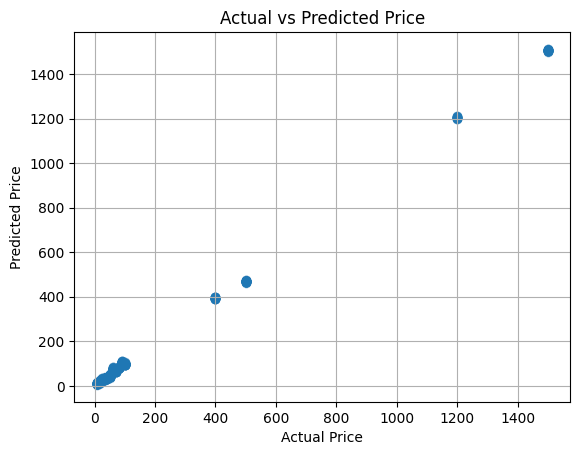

Mean Squared Error: 107.79634070474934


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Add File Path of the CSV file here 
file_path = "C:/Users/johne/Downloads/Customer360Insights.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Removing any trailing spaces from column names
df.columns = df.columns.str.strip()

# Defining the features and target
features = ['Gender', 'Age', 'CreditScore', 'MonthlyIncome', 'Country', 'State', 'City', 'Quantity', 'CampaignSchema', 'Category']
target = 'Price'

# Converting numeric features ('CreditScore' and 'MonthlyIncome') into 4 bins each using KBinsDiscretizer
kbins_credit_score = KBinsDiscretizer(n_bins=4, encode='onehot', strategy='uniform')
kbins_monthly_income = KBinsDiscretizer(n_bins=4, encode='onehot', strategy='uniform')

# Fitting and transforming the columns
credit_score_bins = kbins_credit_score.fit_transform(df[['CreditScore']]).toarray()
monthly_income_bins = kbins_monthly_income.fit_transform(df[['MonthlyIncome']]).toarray()

# Creating new columns from the bins
credit_score_df = pd.DataFrame(credit_score_bins, columns=[f'CreditScore_Bin_{i}' for i in range(1, 5)])
monthly_income_df = pd.DataFrame(monthly_income_bins, columns=[f'MonthlyIncome_Bin_{i}' for i in range(1, 5)])

# Concatenating the new bin features to the original dataframe
df = pd.concat([df, credit_score_df, monthly_income_df], axis=1)

# Checking for columns that need one-hot encoding and are present in the DataFrame
categorical_columns = ['Gender', 'Country', 'State', 'City', 'CampaignSchema', 'Category']
available_categorical_columns = [col for col in categorical_columns if col in df.columns]

# One-hot encoding the available categorical features
df = pd.get_dummies(df, columns=available_categorical_columns, drop_first=True)

# Updating features after binning and encoding
features = [col for col in df.columns if col not in ['Price', 'CreditScore', 'MonthlyIncome', 
                                                     'SessionStart', 'SessionEnd', 'CartAdditionTime', 
                                                     'OrderConfirmationTime', 'FullName', 'ReturnReason', 
                                                     'CustomerID', 'OrderReturn', 'PaymentMethod', 'Product']]

# Defining X and y
X = df[features]
y = df[target]  # Using Price as the target for regression

# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# Plotting predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid()
plt.show()

# Displaying Mean Squared Error
print(f'Mean Squared Error: {mse}')
